<a href="https://colab.research.google.com/github/hasanaliakhtar/Cap-Planning---Hourly-Order-Forecasts/blob/main/Order_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
!pip install prophet

In [ ]:
!pip install pystan

In [2]:
import pandas as pd 

In [3]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [54]:
df = pd.read_csv('/content/hodew1.csv')
 

In [55]:
dk = df[df['warehouse'] == 'Lahore EW1']

In [56]:
dk


,Unnamed: 0,warehouse,week,day,dow,hr,time,orders
0,0,Lahore EW1,2020-12-28 00:00:00+00:00,2021-01-01 00:00:00+00:00,5,9,2021-01-01 09:00:00+00,8
1,1,Lahore EW1,2020-12-28 00:00:00+00:00,2021-01-01 00:00:00+00:00,5,10,2021-01-01 10:00:00+00,15
2,2,Lahore EW1,2020-12-28 00:00:00+00:00,2021-01-01 00:00:00+00:00,5,11,2021-01-01 11:00:00+00,12
3,3,Lahore EW1,2020-12-28 00:00:00+00:00,2021-01-01 00:00:00+00:00,5,12,2021-01-01 12:00:00+00,20
4,4,Lahore EW1,2020-12-28 00:00:00+00:00,2021-01-01 00:00:00+00:00,5,13,2021-01-01 13:00:00+00,24
...,...,...,...,...,...,...,...,...
4135,4135,Lahore EW1,2021-08-02 00:00:00+00:00,2021-08-06 00:00:00+00:00,5,22,2021-08-06 22:00:00+00,33
4136,4136,Lahore EW1,2021-08-02 00:00:00+00:00,2021-08-06 00:00:00+00:00,5,23,2021-08-06 23:00:00+00,34
4137,4137,Lahore EW1,2021-08-02 00:00:00+00:00,2021-08-07 00:00:00+00:00,6,0,2021-08-07 00:00:00+00,63
4138,4138,Lahore EW1,2021-08-02 00:00:00+00:00,2021-08-07 00:00:00+00:00,6,1,2021-08-07 01:00:00+00,34


In [57]:
from fbprophet import Prophet


In [ ]:
!pip install neuralprophet

In [ ]:
from neuralprophet import NeuralProphet


In [58]:
df = df[['time','orders']]


In [59]:
df.columns = ['ds','y']

In [60]:
df.dtypes


ds    object
y      int64
dtype: object

In [61]:
df['ds'] = pd.to_datetime(df['ds'])

In [62]:
df


,ds,y
0,2021-01-01 09:00:00+00:00,8
1,2021-01-01 10:00:00+00:00,15
2,2021-01-01 11:00:00+00:00,12
3,2021-01-01 12:00:00+00:00,20
4,2021-01-01 13:00:00+00:00,24
...,...,...
4135,2021-08-06 22:00:00+00:00,33
4136,2021-08-06 23:00:00+00:00,34
4137,2021-08-07 00:00:00+00:00,63
4138,2021-08-07 01:00:00+00:00,34


In [63]:
df['ds'] = df.apply(lambda x: x['ds'].replace(tzinfo=None),axis=1)

In [77]:
m = Prophet(growth='logistic')


In [64]:
m = Prophet(changepoint_prior_scale=0.01).fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [72]:
future = m.make_future_dataframe(periods=168, freq='H')

In [73]:
forecast = m.predict(future)


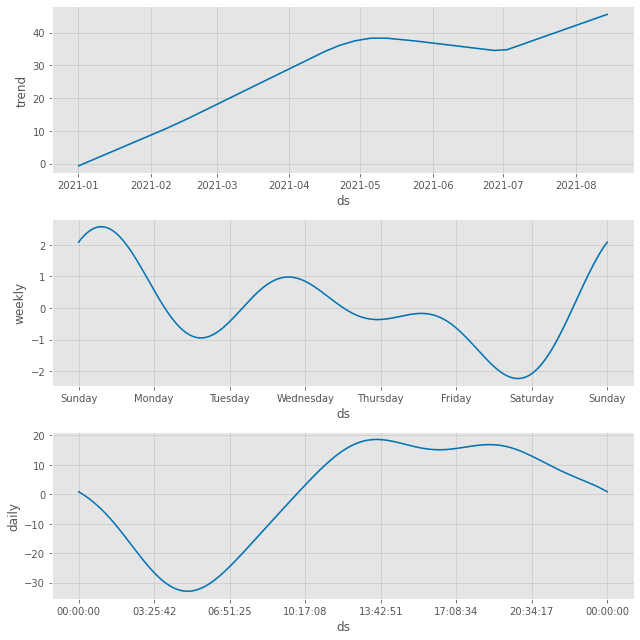

In [75]:
fig = m.plot_components(forecast)


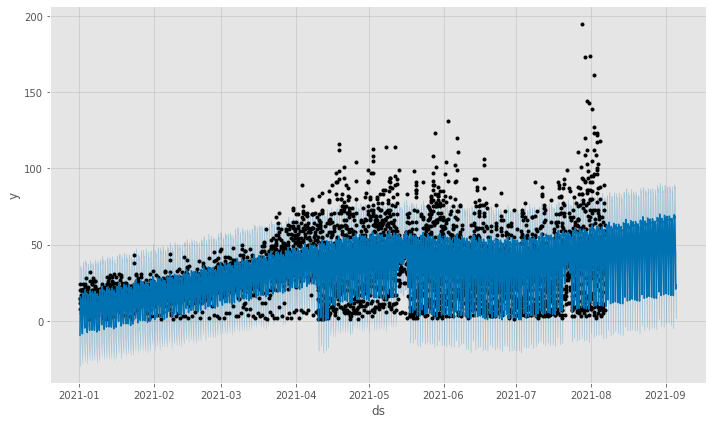

In [69]:
fig = m.plot(forecast)


In [71]:
from prophet.plot import add_changepoints_to_plot


ModuleNotFoundError: ignored

In [51]:
m = NeuralProphet(
    changepoints_range=0.8,
    n_changepoints=10,
    trend_reg=1.5,
    )     


NameError: ignored

In [ ]:
metrics = m.fit(df, freq='H')

INFO: nprophet.utils - set_auto_seasonalities: Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 15


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 3.51E-01
Epoch[15/15]: 100%|██████████| 15/15 [00:03<00:00,  3.95it/s, SmoothL1Loss=0.0196, MAE=11.5, RegLoss=0.00293]


In [ ]:
future = m.make_future_dataframe(df, periods=, n_historic_predictions=len(df))


In [ ]:
forecast = m.predict(future)


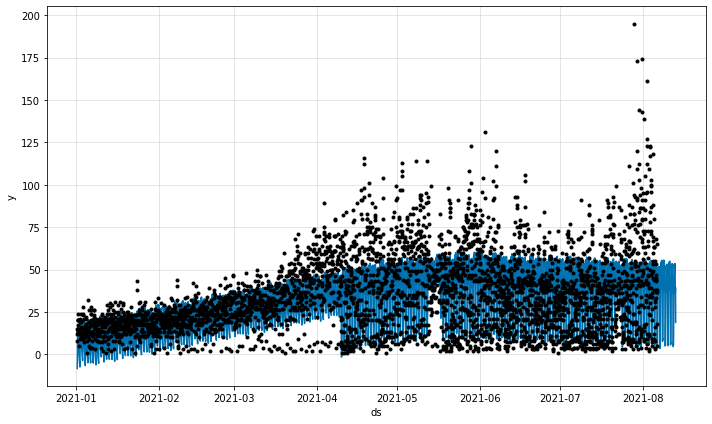

In [ ]:
fig = m.plot(forecast)


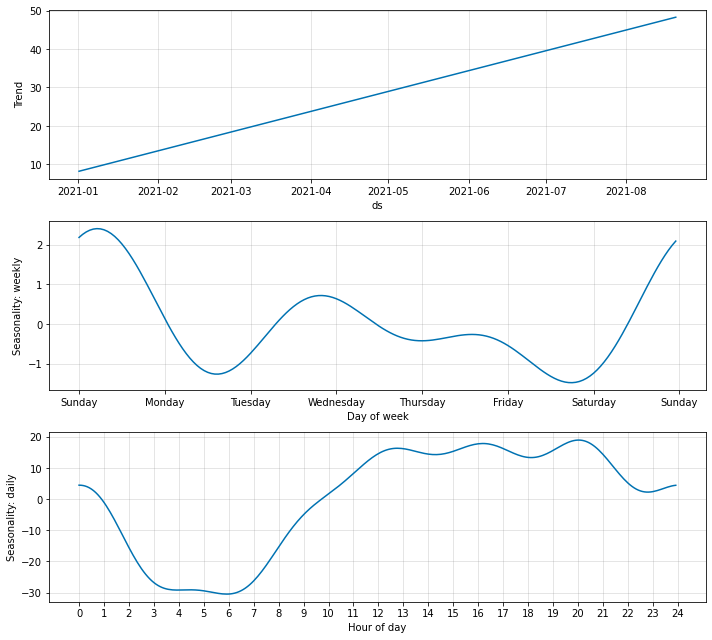

In [ ]:
fig_comp = m.plot_components(forecast)

In [ ]:
forecast



,ds,y,yhat1,residual1,trend,season_weekly,season_daily
0,2021-01-01 09:00:00,8,-8.390393,-16.3904,-0.192295,-1.534865,-6.663233
1,2021-01-01 10:00:00,15,-0.971808,-15.9718,-0.179546,-1.646756,0.854494
2,2021-01-01 11:00:00,12,6.324446,-5.67555,-0.166798,-1.754242,8.245484
3,2021-01-01 12:00:00,20,13.464184,-6.53582,-0.154049,-1.855866,15.474098
4,2021-01-01 13:00:00,24,15.759352,-8.24065,-0.141301,-1.950189,17.850842
...,...,...,...,...,...,...,...
4279,2021-08-12 22:00:00,None,38.956936,None,35.007751,-0.396072,4.345255
4280,2021-08-12 23:00:00,None,36.237892,None,35.004951,-0.472195,1.705132
4281,2021-08-13 00:00:00,None,39.481785,None,35.002148,-0.556365,5.036000
4282,2021-08-13 01:00:00,None,34.625381,None,34.999344,-0.647973,0.274013


In [ ]:
forecast.to_csv('/content/hodew1f.csv',index=False)

In [ ]:
forecast['date_column'] = pd.to_datetime(forecast['ds']).dt.date

In [ ]:
forecast

,ds,y,yhat1,residual1,trend,season_weekly,season_daily,date_column,datethourime
0,2021-01-01 09:00:00,8,-8.390393,-16.3904,-0.192295,-1.534865,-6.663233,2021-01-01,9
1,2021-01-01 10:00:00,15,-0.971808,-15.9718,-0.179546,-1.646756,0.854494,2021-01-01,10
2,2021-01-01 11:00:00,12,6.324446,-5.67555,-0.166798,-1.754242,8.245484,2021-01-01,11
3,2021-01-01 12:00:00,20,13.464184,-6.53582,-0.154049,-1.855866,15.474098,2021-01-01,12
4,2021-01-01 13:00:00,24,15.759352,-8.24065,-0.141301,-1.950189,17.850842,2021-01-01,13
...,...,...,...,...,...,...,...,...,...
4279,2021-08-12 22:00:00,None,38.956936,NaN,35.007751,-0.396072,4.345255,2021-08-12,22
4280,2021-08-12 23:00:00,None,36.237892,NaN,35.004951,-0.472195,1.705132,2021-08-12,23
4281,2021-08-13 00:00:00,None,39.481785,NaN,35.002148,-0.556365,5.036000,2021-08-13,0
4282,2021-08-13 01:00:00,None,34.625381,NaN,34.999344,-0.647973,0.274013,2021-08-13,1


In [ ]:
forecast.to_csv('/content/hodew1f.csv',index=False)

In [6]:
df = pd.read_csv('/content/Wk Season l4 orders.csv') 

In [9]:
df

,warehouse,day,orders,week_rank
0,Karachi EW6,1. Monday,650,1
1,Faisalabad EW1,1. Monday,235,3
2,Gujranwala EW1,1. Monday,157,1
3,Karachi EW6,1. Monday,325,1
4,Karachi EW6,1. Monday,432,2
...,...,...,...,...
873,Karachi EW6,7. Sunday,406,1
874,Lahore EW2,7. Sunday,507,1
875,Lahore EW2,7. Sunday,554,2
876,Lahore EW2,7. Sunday,496,3


In [21]:
import matplotlib as ml

In [23]:
import seaborn as sns


In [25]:
matplotlib inline


In [28]:
ml.style.use('ggplot')


In [30]:
import scipy

In [32]:
df.pivot

<bound method DataFrame.pivot of           warehouse           day  orders  week_rank
0       Karachi EW6  1. Monday        650          1
1    Faisalabad EW1  1. Monday        235          3
2    Gujranwala EW1  1. Monday        157          1
3       Karachi EW6  1. Monday        325          1
4       Karachi EW6  1. Monday        432          2
..              ...           ...     ...        ...
873     Karachi EW6  7. Sunday        406          1
874      Lahore EW2  7. Sunday        507          1
875      Lahore EW2  7. Sunday        554          2
876      Lahore EW2  7. Sunday        496          3
877      Lahore EW2  7. Sunday        524          4

[878 rows x 4 columns]>

In [36]:
!pip install pivottablejs

In [ ]:
from pivottablejs import pivot_ui


In [43]:
from IPython.display import HTML


In [ ]:
pivot_ui(df, outfile_path='pivottablejs.html')


# **Daily Trend for past 4 weeks **// LHR

---



In [49]:
HTML('pivottablejs.html')


In [ ]:
HTML('pivottablejs.html')


# **Daily Trend for past 4 weeks **// KHI

---



In [50]:
HTML('pivottablejs.html')
